In [ ]:
#Sample code for decision tree algorithm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/car_details.csv')

In [ ]:
df.head()
df1 = df.copy()
df1.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
owners=df['owner'].unique()
transmission = df['transmission'].unique()
seller_type = df['seller_type'].unique()
print(owners,transmission,seller_type)

['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car'] ['Manual' 'Automatic'] ['Individual' 'Dealer' 'Trustmark Dealer']


In [ ]:
df1.drop('name', inplace=True, axis=1)

In [ ]:
df1.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
owners=df1['owner'].unique()
transmission = df1['transmission'].unique()
seller_type = df1['seller_type'].unique()
fuel = df1['fuel'].unique()

In [ ]:
t = {owners[0]: 0, owners[1]: 1, owners[2]: 2, owners[3]: 3, owners[4]: 4}
df1['owner'] = df1['owner'].map(t)

t = {transmission[0] : 0, transmission[1] : 1}
df1['transmission'] = df1['transmission'].map(t)

t = {seller_type[0] : 0, seller_type[1] : 1, seller_type[2] : 2}
df1['seller_type'] = df1['seller_type'].map(t)

t = {fuel[0] : 0, fuel[1] : 1, fuel[2] : 2, fuel[3] : 3, fuel[4] : 4}
df1['fuel'] = df1['fuel'].map(t)

In [ ]:
df1.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,0,0,0,0
1,2007,135000,50000,0,0,0,0
2,2012,600000,100000,1,0,0,0
3,2017,250000,46000,0,0,0,0
4,2014,450000,141000,1,0,0,1


In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

[Text(0.4, 0.9166666666666666, 'owner <= 0.5\ngini = 0.388\nsamples = 4340\nvalue = [3244, 994, 102]'),
 Text(0.2, 0.75, 'transmission <= 0.5\ngini = 0.465\nsamples = 2832\nvalue = [1890, 844, 98]'),
 Text(0.1, 0.5833333333333334, 'gini = 0.434\nsamples = 2483\nvalue = [1750, 650, 83]'),
 Text(0.3, 0.5833333333333334, 'gini = 0.528\nsamples = 349\nvalue = [140, 194, 15]'),
 Text(0.6, 0.75, 'owner <= 3.5\ngini = 0.184\nsamples = 1508\nvalue = [1354, 150, 4]'),
 Text(0.5, 0.5833333333333334, 'transmission <= 0.5\ngini = 0.167\nsamples = 1491\nvalue = [1354, 133, 4]'),
 Text(0.3, 0.4166666666666667, 'owner <= 1.5\ngini = 0.147\nsamples = 1393\nvalue = [1282, 111, 0]'),
 Text(0.2, 0.25, 'gini = 0.178\nsamples = 1031\nvalue = [929, 102, 0]'),
 Text(0.4, 0.25, 'owner <= 2.5\ngini = 0.048\nsamples = 362\nvalue = [353, 9, 0]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.049\nsamples = 79\nvalue = [77, 2, 0]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.048\nsamples = 283\nvalue = [276, 7, 0]'),


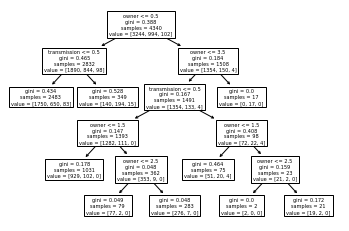

In [ ]:
features = ['km_deriven', 'fuel']

X = df1[features]
y = df1['selling_price']

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=features)

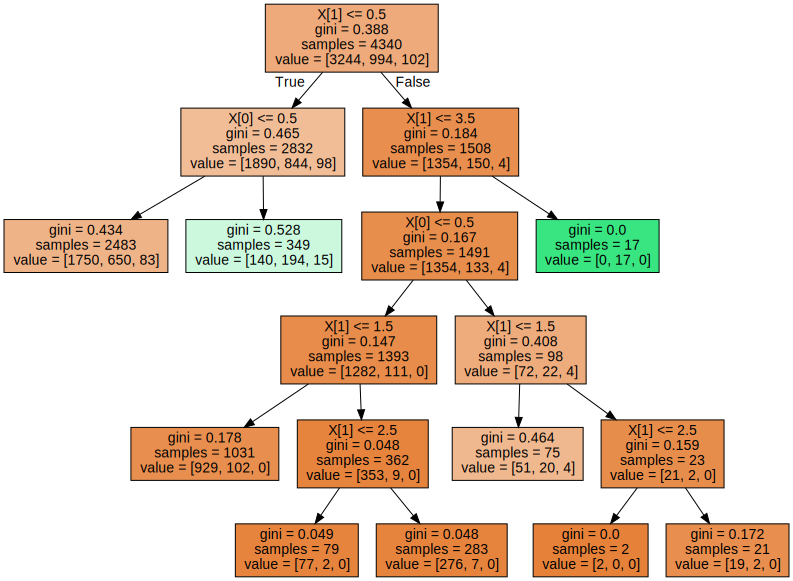

In [ ]:
import graphviz
dot_data = tree.export_graphviz(dtree, out_file=None, filled = True)

graph = graphviz.Source(dot_data, format="png",)
graph

[[1210   49    0]
 [ 337   96    0]
 [  37    7    0]]


              precision    recall  f1-score   support

           0       0.76      0.96      0.85      1259
           1       0.63      0.22      0.33       433
           2       0.00      0.00      0.00        44

    accuracy                           0.75      1736
   macro avg       0.47      0.39      0.39      1736
weighted avg       0.71      0.75      0.70      1736



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.4, 0.9166666666666666, 'X[1] <= 0.5\nentropy = 0.898\nsamples = 2604\nvalue = [1985, 561, 58]'),
 Text(0.2, 0.75, 'X[0] <= 0.5\nentropy = 1.051\nsamples = 1701\nvalue = [1165, 480, 56]'),
 Text(0.1, 0.5833333333333334, 'entropy = 1.0\nsamples = 1492\nvalue = [1074, 370, 48]'),
 Text(0.3, 0.5833333333333334, 'entropy = 1.19\nsamples = 209\nvalue = [91, 110, 8]'),
 Text(0.6, 0.75, 'X[1] <= 3.5\nentropy = 0.458\nsamples = 903\nvalue = [820, 81, 2]'),
 Text(0.5, 0.5833333333333334, 'X[0] <= 0.5\nentropy = 0.441\nsamples = 898\nvalue = [820, 76, 2]'),
 Text(0.3, 0.4166666666666667, 'X[1] <= 1.5\nentropy = 0.393\nsamples = 840\nvalue = [775, 65, 0]'),
 Text(0.2, 0.25, 'entropy = 0.454\nsamples = 629\nvalue = [569, 60, 0]'),
 Text(0.4, 0.25, 'X[1] <= 2.5\nentropy = 0.162\nsamples = 211\nvalue = [206, 5, 0]'),
 Text(0.3, 0.08333333333333333, 'entropy = 0.129\nsamples = 56\nvalue = [55, 1, 0]'),
 Text(0.5, 0.08333333333333333, 'entropy = 0.173\nsamples = 155\nvalue = [151, 4, 0]'),
 Tex

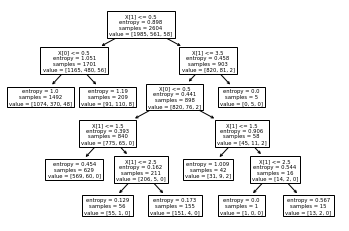

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()

df2 = df.copy()
df2.drop('name', inplace=True, axis=1)
# print(df2.head())

df2['year'] = Le.fit_transform(df2['year'])
df2['fuel'] = Le.fit_transform(df2['fuel'])
df2['seller_type'] = Le.fit_transform(df2['seller_type'])
df2['transmission'] = Le.fit_transform(df2['transmission'])
df2['owner'] = Le.fit_transform(df2['owner'])

# print(df2.head())

features = ['transmission', 'owner']
X = df1[features]
y = df1['seller_type']

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size= 0.4)

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(criterion = 'entropy')
dtree.fit(X_train,y_train)
predictions= dtree.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
tree.plot_tree(dtree)